In [1]:

!pip install -U --pre tensorflow=="2.*"

     |████████████████████████████████| 421.8MB 12kB/s  eta 0:00:01    |█                               | 13.5MB 840kB/s eta 0:08:06     |█▌                              | 20.2MB 1.2MB/s eta 0:05:29     |██▎                             | 30.2MB 2.4MB/s eta 0:02:41     |██▍                             | 31.9MB 2.4MB/s eta 0:02:40     |████                            | 52.1MB 2.3MB/s eta 0:02:43     |████████                        | 105.2MB 760kB/s eta 0:06:57     |████████▊                       | 114.4MB 2.2MB/s eta 0:02:21     |████████▊                       | 114.5MB 2.2MB/s eta 0:02:21     |█████████▌                      | 124.9MB 2.4MB/s eta 0:02:02     |█████████▌                      | 125.9MB 1.8MB/s eta 0:02:49     |███████████                     | 143.7MB 1.0MB/s eta 0:04:37     |███████████▋                    | 152.8MB 2.2MB/s eta 0:02:03     |████████████                    | 158.3MB 995kB/s eta 0:04:25     |█████████████▉                  | 182.1MB 1.6MB/s eta 0:02:35 

  Using cached https://files.pythonhosted.org/packages/05/57/ce2e7a8fa7c0afb54a0581b14a65b56e62b5759dbc98e80627142b8a3704/oauthlib-3.1.0-py2.py3-none-any.whl
ERROR: botocore 1.13.10 requires docutils<0.16,>=0.10, which is not installed.
ERROR: awscli 1.16.274 requires colorama<0.4.2,>=0.2.5; python_version != "2.6" and python_version != "3.3", which is not installed.
ERROR: awscli 1.16.274 requires docutils<0.16,>=0.10, which is not installed.
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.16.1 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random


In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 731c5ac602752760c8e48fbffcf8c3b850d9dc2a2aedcf2cc48468fc17b673d1 so we will re-download the data.
11493376/11490434 [==============================] - 6s 1us/step


In [3]:
print('Normalize the input image so that each pixel value is between 0 to 1')
train_images = train_images / 255.0
test_images = test_images / 255.0
print('Pixels are normalized')

Normalize the input image so that each pixel value is between 0 to 1
Pixels are normalized


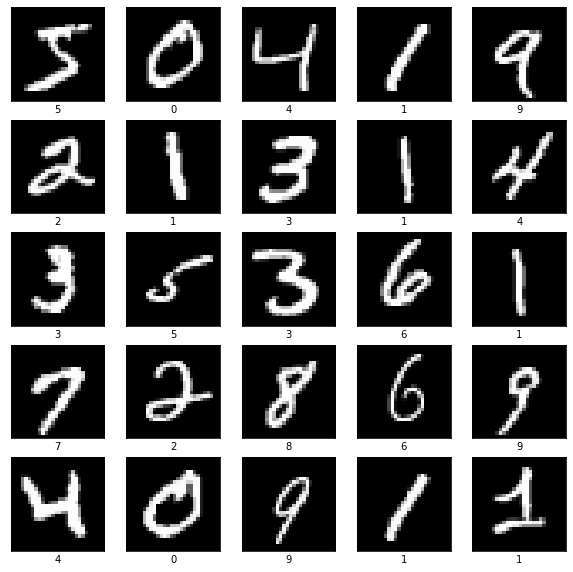

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.gray)
  plt.xlabel(train_labels[i])
plt.show()

In [5]:
# Define the model architecture
model = keras.Sequential([
  keras.layers.InputLayer(input_shape=(28, 28)),
  keras.layers.Reshape(target_shape=(28, 28, 1)),
  keras.layers.Conv2D(filters=12, kernel_size=(3, 3), activation=tf.nn.relu),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Flatten(),
  keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Define how to train the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the digit classification model
model.fit(train_images, train_labels, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 15s 254us/sample - loss: 0.2987 - accuracy: 0.9153
Epoch 2/3
60000/60000 [==============================] - 14s 233us/sample - loss: 0.1291 - accuracy: 0.9630
Epoch 3/3
60000/60000 [==============================] - 14s 240us/sample - loss: 0.0914 - accuracy: 0.9734


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 12)        120       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 12)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2028)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                20290     
Total params: 20,410
Trainable params: 20,410
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Evaluate the model using all images in the test dataset.
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 142us/sample - loss: 0.0792 - accuracy: 0.9751
Test accuracy: 0.9751


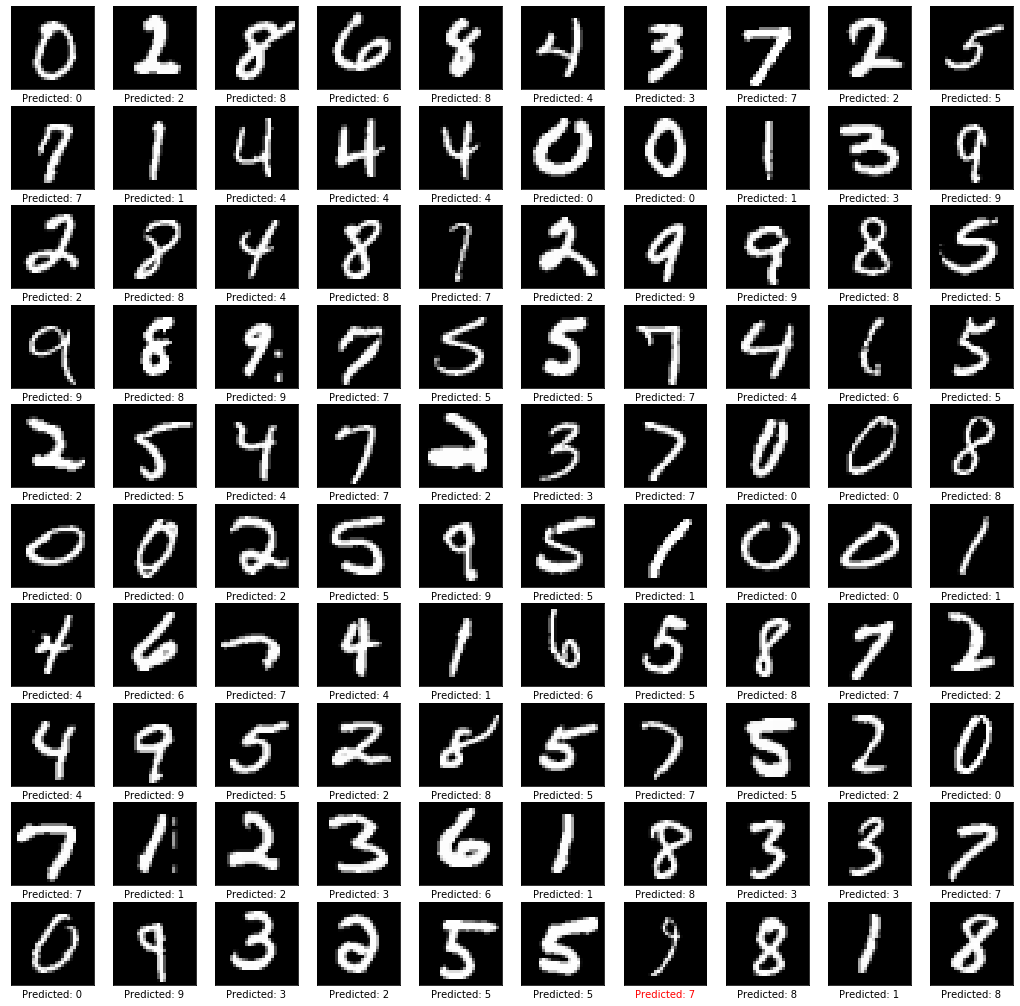

In [8]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Predict the labels of digit images in our test dataset.
predictions = model.predict(test_images)

# As the model output 10 float representing the probability of the input image
# being a digit from 0 to 9, we need to find the largest probability value
# to find out which digit the model predicts to be most likely in the image.
prediction_digits = np.argmax(predictions, axis=1)

# Then plot 100 random test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(18, 18))
for i in range(100):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  image_index = random.randint(0, len(prediction_digits))
  plt.imshow(test_images[image_index], cmap=plt.cm.gray)
  ax.xaxis.label.set_color(get_label_color(prediction_digits[image_index],\
                                           test_labels[image_index]))
  plt.xlabel('Predicted: %d' % prediction_digits[image_index])
plt.show()

In [9]:
# Convert Keras model to TF Lite format.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_float_model = converter.convert()

# Show model size in KBs.
float_model_size = len(tflite_float_model) / 1024
print('Float model size = %dKBs.' % float_model_size)

Float model size = 81KBs.


In [10]:
# Re-convert the model to TF Lite using quantization.
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

# Show model size in KBs.
quantized_model_size = len(tflite_quantized_model) / 1024
print('Quantized model size = %dKBs,' % quantized_model_size)
print('which is about %d%% of the float model size.'\
      % (quantized_model_size * 100 / float_model_size))

Quantized model size = 22KBs,
which is about 27% of the float model size.


In [11]:
# A helper function to evaluate the TF Lite model using "test" dataset.
def evaluate_tflite_model(tflite_model):
  # Initialize TFLite interpreter using the model.
  interpreter = tf.lite.Interpreter(model_content=tflite_model)
  interpreter.allocate_tensors()
  input_tensor_index = interpreter.get_input_details()[0]["index"]
  output = interpreter.tensor(interpreter.get_output_details()[0]["index"])

  # Run predictions on every image in the "test" dataset.
  prediction_digits = []
  for test_image in test_images:
    # Pre-processing: add batch dimension and convert to float32 to match with
    # the model's input data format.
    test_image = np.expand_dims(test_image, axis=0).astype(np.float32)
    interpreter.set_tensor(input_tensor_index, test_image)

    # Run inference.
    interpreter.invoke()

    # Post-processing: remove batch dimension and find the digit with highest
    # probability.
    digit = np.argmax(output()[0])
    prediction_digits.append(digit)

  # Compare prediction results with ground truth labels to calculate accuracy.
  accurate_count = 0
  for index in range(len(prediction_digits)):
    if prediction_digits[index] == test_labels[index]:
      accurate_count += 1
  accuracy = accurate_count * 1.0 / len(prediction_digits)

  return accuracy

# Evaluate the TF Lite float model. You'll find that its accurary is identical
# to the original TF (Keras) model because they are essentially the same model
# stored in different format.
float_accuracy = evaluate_tflite_model(tflite_float_model)
print('Float model accuracy = %.4f' % float_accuracy)

# Evalualte the TF Lite quantized model.
# Don't be surprised if you see quantized model accuracy is higher than
# the original float model. It happens sometimes :)
quantized_accuracy = evaluate_tflite_model(tflite_quantized_model)
print('Quantized model accuracy = %.4f' % quantized_accuracy)
print('Accuracy drop = %.4f' % (float_accuracy - quantized_accuracy))

Float model accuracy = 0.9751
Quantized model accuracy = 0.9754
Accuracy drop = -0.0003


In [ ]:
# Save the quantized model to file to the Downloads directory
f= open('mnist.tflite', "wb")
f.write(tflite_quantized_model)
f.close()

# Download the digit classification model
from google.colab import files
files.download('mnist.tflite')
print('mnist.tflite has been downloaded')